An Exercise in Data Wrangling

This is a practice exercise on Data Wrangling. I have followed Liam Lim's article on Medium (https://medium.com/@liam.lim/data-engineering-project-1-data-wrangling-with-python-077f7cd0912b). The dataset is from Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
# filepath
filepath = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [3]:
#headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
#Reading the file
df = pd.read_csv(filepath, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
# Setting the column display = 30
pd.set_option('display.max_columns', 30)

MISSING VALUES

In [5]:
#checking for missing values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
#Replacing '?' with np.nan
df.replace('?', np.nan, inplace = True)

In [7]:
#Checking for np.nan
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
### Replacing the numeric columns with mean.
#Calculating the mean 
mean_norm_losses = df['normalized-losses'].astype('float').mean(axis=0)
mean_bore = df['bore'].astype('float').mean(axis=0)
mean_stroke = df['stroke'].astype('float').mean(axis=0)
mean_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
mean_horsepower = df['horsepower'].astype('float').mean(axis=0)

In [9]:
# Replacing the missing values with mean
df['normalized-losses'].replace(np.nan,mean_norm_losses,inplace = True)
df['bore'].replace(np.nan,mean_bore,inplace = True)
df['stroke'].replace(np.nan,mean_stroke,inplace = True)
df['peak-rpm'].replace(np.nan,mean_peak_rpm,inplace = True)
df['horsepower'].replace(np.nan,mean_horsepower,inplace = True)

In [10]:
# Replacing the missing values in 'num-of-doors' with mode.
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [11]:
# Replacing the missing values in 'num-of-doors' with 'four' (highest frequency)
df['num-of-doors'].replace(np.nan,'four', inplace=True)

In [12]:
# Dropping the missing values in 'price' as this is the dependent variable in the Regression analysis to be conducted later.
df.dropna(subset = ['price'], axis = 0, inplace = True)

In [20]:
# Resetting the index after dropping the rows
df.reset_index(drop = True, inplace = True)

In [14]:
# Checking for missing values again.
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

DATATYPES

In [17]:
# Checking the datatypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
# Changing the datatypes
df[['normalized-losses','bore','stroke','horsepower','price']] = df[['normalized-losses','bore','stroke','horsepower','price']].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('int')

STANDARDIZATION

In [21]:
# Standardizing mpg to liters_per_100km
df['city_litres_per_100km'] = 235/df['city-mpg']
df['highway_litres_per_100km'] = 235/df['highway-mpg']

In [22]:
# Renaming the columns
df.rename(columns = {'city-mpg': 'city_litres_per_100km', 'highway-mpg' : 'highway_litres_per_100km'}, inplace = True)

NORMALIZATION

In [23]:
# Normalizing 'length', 'height' and 'width' columns
df[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [24]:
# Normalizing the columns by dividing the orginal by max value of the column
df['length'] = df['length']/df['length'].max()
df['height'] = df['height']/df['height'].max()
df['width'] = df['width']/df['width'].max()

In [25]:
# Normalized 'length', 'height' and 'width' columns
df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


BINNING

In [26]:
# Creating 'Low', 'Medium', 'High' categories in 'horsepower'
# Changing the datatype first to int
df['horsepower'] = df['horsepower'].astype('int')

In [27]:
# Plotting the histogram of horsepower to see the distribution of horsepower.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'horsepower bins')

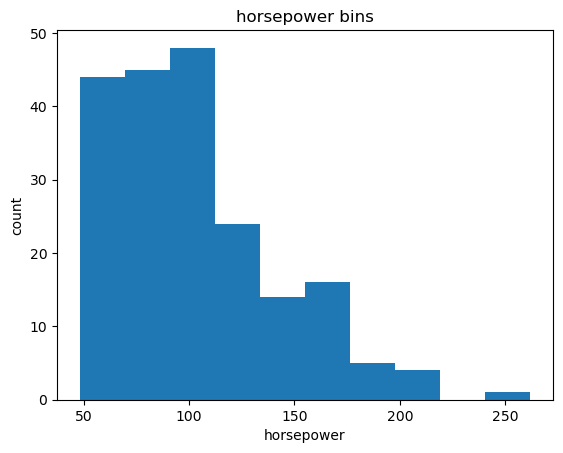

In [28]:
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [29]:
# Creating bins using the linspace method
bins = np.linspace(min(df['horsepower']), max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [30]:
# Creating group labels
group_names = ['Low','Medium','High']

In [31]:
# Creating the bins using the pd.cut method
df['horsepower_binned'] = pd.cut(df['horsepower'],bins, labels = group_names, include_lowest = True)

In [32]:
df[['horsepower','horsepower_binned']].head()

,horsepower,horsepower_binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [33]:
df['horsepower_binned'].value_counts()


horsepower_binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Horsepower Categories')

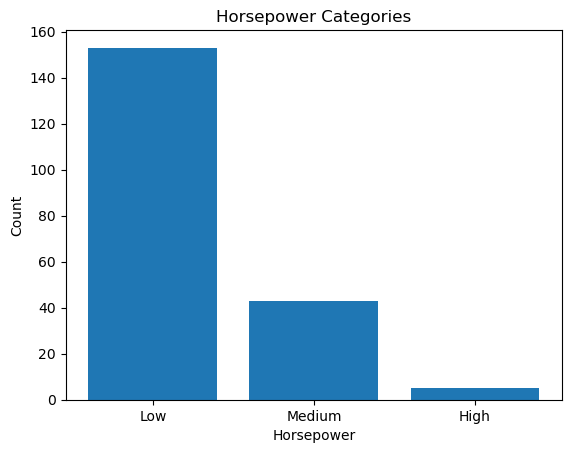

In [34]:
# Plotting the bins
pyplot.bar(group_names,df['horsepower_binned'].value_counts())
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Categories")